# <Font color = 'indianred'>**HW5 - Prachi Dalal**

# <Font color = 'indianred'>**1. Set Environment**

In [ ]:
  !pip install torchtext -qq
  !pip install transformers evaluate wandb datasets accelerate -U -qq ## NEW LINES ##

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
# If in Colab, then import the drive module from google.colab
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  # Mount the Google Drive to access files stored there
  drive.mount('/content/drive')

  basepath = '/content/drive/MyDrive/BUAN 6342'
else:
  basepath = '/Users/prachidalal/Desktop/SPRING\ 2024/BUAN\ 6342'

Mounted at /content/drive


In [ ]:
get_ipython()

In [311]:
# Importing PyTorch library for tensor computations and neural network modules
import torch
import torch.nn as nn

# For working with textual data vocabularies and for displaying model summaries
from torchtext.vocab import vocab

# General-purpose Python libraries for random number generation and numerical operations
import random
import numpy as np
import pandas as pd

# Utilities for efficient serialization/deserialization of Python objects and for element tallying
import joblib
from collections import Counter

# For creating lightweight attribute classes and for partial function application
from functools import partial

# For filesystem path handling, generating and displaying confusion matrices, and date-time manipulations
from pathlib import Path
from sklearn.metrics import confusion_matrix,hamming_loss, f1_score
from datetime import datetime

# For plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

### NEW ##########################
# imports from Huggingface ecosystem
from transformers.modeling_outputs import SequenceClassifierOutput
from transformers import PreTrainedModel, PretrainedConfig
from transformers import TrainingArguments, Trainer
from datasets import Dataset
import evaluate

# wandb library
import wandb

#For Preprocessor
from sklearn.base import BaseEstimator, TransformerMixin
from bs4 import BeautifulSoup
import re
import spacy
import numpy as np
from nltk.stem.porter import PorterStemmer
import os

#ML Libraries
from sklearn.model_selection import train_test_split

In [312]:
base_folder = Path(basepath)
model_folder = base_folder/'models'

In [313]:
model_folder.mkdir(exist_ok=True, parents = True)

In [314]:
model_folder

PosixPath('/content/drive/MyDrive/BUAN 6342/models')

In [315]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content


In [ ]:
pip install transformers datasets

In [ ]:
pip install datasets

# <Font color = 'indianred'>**2. Load & Preprocess Hugging Face Datasets**

In [316]:
import pandas as pd
from datasets import Dataset
import re

# Read the CSV file into a pandas DataFrame
path = "/content/drive/MyDrive/BUAN 6342/train.csv"
df_train = pd.read_csv(path)

df_train.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1
1,2017-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0
2,2017-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0
3,2017-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0
4,2017-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0


In [317]:
import pandas as pd
from datasets import Dataset
import re

# Read the CSV file into a pandas DataFrame
path = "/content/drive/MyDrive/BUAN 6342/test.csv"
df_test = pd.read_csv(path)

df_test.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-01559,@Adnan__786__ @AsYouNotWish Dont worry Indian ...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1,2018-03739,"Academy of Sciences, eschews the normally sobe...",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2,2018-00385,I blew that opportunity -__- #mad,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3,2018-03001,This time in 2 weeks I will be 30... 😥,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4,2018-01988,#Deppression is real. Partners w/ #depressed p...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [407]:
len(df_test)

3259

In [318]:
class SpacyPreprocessor(BaseEstimator, TransformerMixin):

    def __init__(self, model, *, batch_size = 64, lemmatize=True, lower=True, remove_stop=True,
                remove_punct=True, remove_email=True, remove_url=True, remove_num=False, stemming = False,
                add_user_mention_prefix=True, remove_hashtag_prefix=False, basic_clean_only=False):

        self.model = model
        self.batch_size = batch_size
        self.remove_stop = remove_stop
        self.remove_punct = remove_punct
        self.remove_num = remove_num
        self.remove_url = remove_url
        self.remove_email = remove_email
        self.lower = lower
        self.add_user_mention_prefix = add_user_mention_prefix
        self.remove_hashtag_prefix = remove_hashtag_prefix
        self.basic_clean_only = basic_clean_only

        if lemmatize and stemming:
            raise ValueError("Only one of 'lemmatize' and 'stemming' can be True.")

        # Validate basic_clean_only option
        if self.basic_clean_only and (lemmatize or lower or remove_stop or remove_punct or remove_num or stemming or
                                      add_user_mention_prefix or remove_hashtag_prefix):
            raise ValueError("If 'basic_clean_only' is set to True, other processing options must be set to False.")

        # Assign lemmatize and stemming

        self.lemmatize = lemmatize
        self.stemming = stemming

    def basic_clean(self, text):
        soup = BeautifulSoup(text, "html.parser")
        text = soup.get_text()
        text = re.sub(r'[\n\r]', ' ', text)
        return text.strip()

    def spacy_preprocessor(self, texts):
        final_result = []
        nlp = spacy.load(self.model)

        # Disable unnecessary pipelines in spaCy model
        if self.lemmatize:
            # Disable parser and named entity recognition
            disabled_pipes = ['parser', 'ner']
        else:
            # Disable tagger, parser, attribute ruler, lemmatizer and named entity recognition
            disabled_pipes = ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

        with nlp.select_pipes(disable=disabled_pipes):
          # Modify tokenizer behavior based on user_mention_prefix and hashtag_prefix settings
          if self.add_user_mention_prefix or self.remove_hashtag_prefix:
              prefixes = list(nlp.Defaults.prefixes)
              if self.add_user_mention_prefix:
                  prefixes += ['@']  # Treat '@' as a separate token
              if self.remove_hashtag_prefix:
                  prefixes.remove(r'#')  # Don't separate '#' from the following text
              prefix_regex = spacy.util.compile_prefix_regex(prefixes)
              nlp.tokenizer.prefix_search = prefix_regex.search

          # Process text data in parallel using spaCy's nlp.pipe()
          for doc in nlp.pipe(texts, batch_size=self.batch_size):
              filtered_tokens = []
              for token in doc:
                  # Check if token should be removed based on specified filters
                  if self.remove_stop and token.is_stop:
                      continue
                  if self.remove_punct and token.is_punct:
                      continue
                  if self.remove_num and token.like_num:
                      continue
                  if self.remove_url and token.like_url:
                      continue
                  if self.remove_email and token.like_email:
                      continue

                  # Append the token's text, lemma, or stemmed form to the filtered_tokens list
                  if self.lemmatize:
                      filtered_tokens.append(token.lemma_)
                  elif self.stemming:
                      filtered_tokens.append(PorterStemmer().stem(token.text))
                  else:
                      filtered_tokens.append(token.text)

              # Join the tokens and apply lowercasing if specified
              text = ' '.join(filtered_tokens)
              if self.lower:
                  text = text.lower()
              final_result.append(text.strip())

        return final_result


    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        try:
            if not isinstance(X, (list, np.ndarray)):
                raise TypeError(f'Expected list or numpy array, got {type(X)}')

            x_clean = [self.basic_clean(text).encode('utf-8', 'ignore').decode() for text in X]

            # Check if only basic cleaning is required
            if self.basic_clean_only:
                return x_clean  # Return the list of basic-cleaned texts

            x_clean_final = self.spacy_preprocessor(x_clean)
            return x_clean_final

        except Exception as error:
            print(f'An exception occurred: {repr(error)}')

In [319]:
# import spacy pre-processor from custom module
preprocessor = SpacyPreprocessor(model='en_core_web_sm', batch_size=64, lemmatize=False, lower=True,
                                    remove_stop=False, remove_punct=False, remove_email=False,
                                    remove_url=False, remove_num=False, stemming=False,
                                    add_user_mention_prefix=False, remove_hashtag_prefix=False, basic_clean_only=False)

In [320]:
cleaned_tweets = preprocessor.fit_transform(df_train['Tweet'].values)

<ipython-input-318-0e4722500373>:33: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [321]:
cleaned_tweets_test = preprocessor.fit_transform(df_test['Tweet'].values)

<ipython-input-318-0e4722500373>:33: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [322]:
df_train['cleaned_tweets']= cleaned_tweets
df_train.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,cleaned_tweets
0,2017-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1,“ worry is a down payment on a problem you may...
1,2017-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0,whatever you decide to do make sure it makes y...
2,2017-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0,@max_kellerman it also helps that the majori...
3,2017-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0,accept the challenges so that you can literall...
4,2017-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0,my roommate : it 's okay that we ca n't spell ...


In [323]:
df_test['cleaned_tweets']= cleaned_tweets_test
df_test.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,cleaned_tweets
0,2018-01559,@Adnan__786__ @AsYouNotWish Dont worry Indian ...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,@adnan__786 _ _ @asyounotwish do nt worry indi...
1,2018-03739,"Academy of Sciences, eschews the normally sobe...",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,"academy of sciences , eschews the normally sob..."
2,2018-00385,I blew that opportunity -__- #mad,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,i blew that opportunity -__- # mad
3,2018-03001,This time in 2 weeks I will be 30... 😥,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,this time in 2 weeks i will be 30 ... 😥
4,2018-01988,#Deppression is real. Partners w/ #depressed p...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,# deppression is real . partners w/ # depresse...


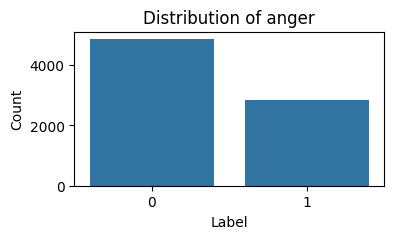

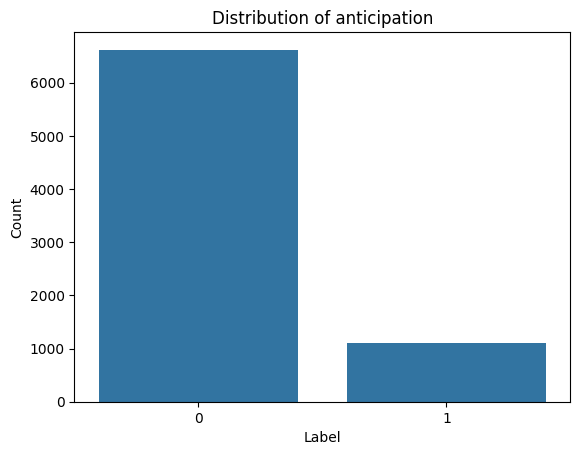

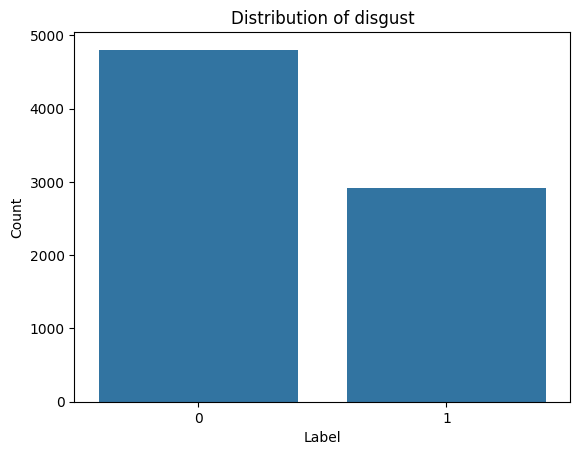

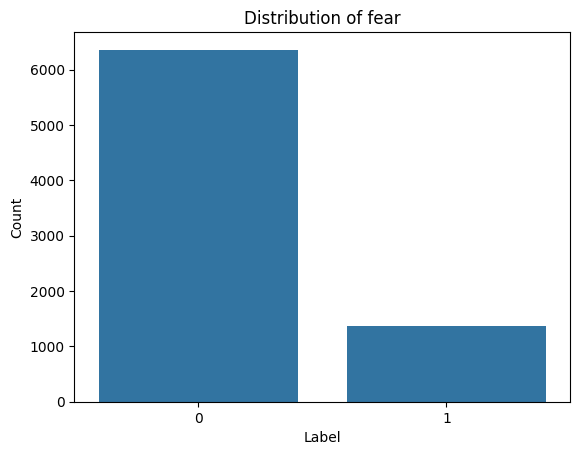

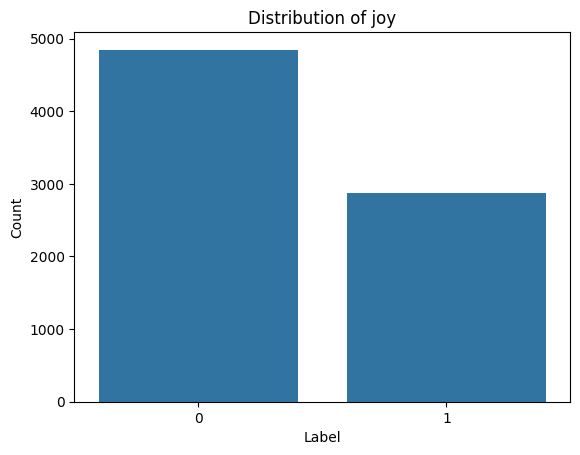

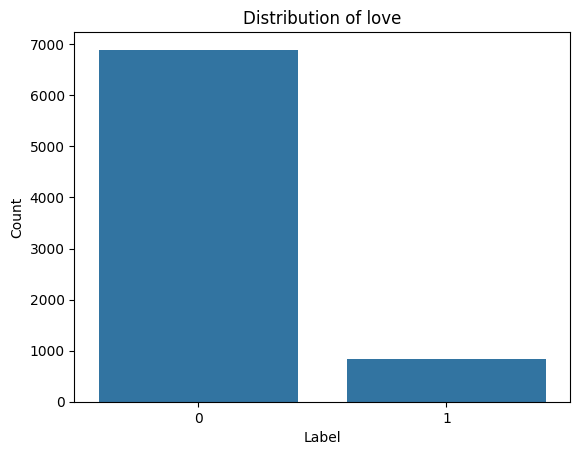

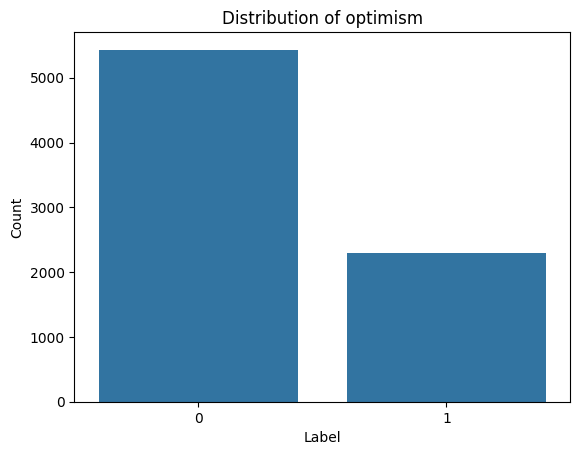

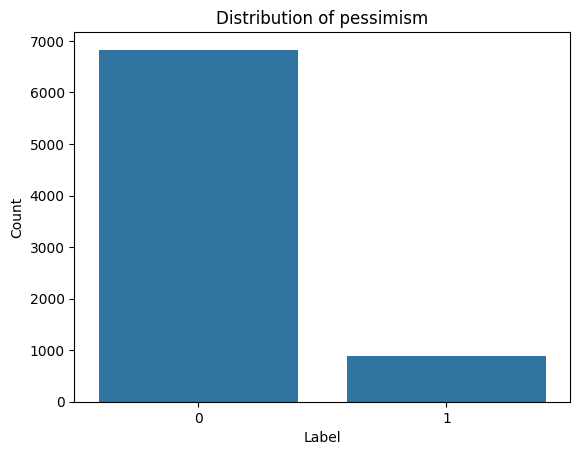

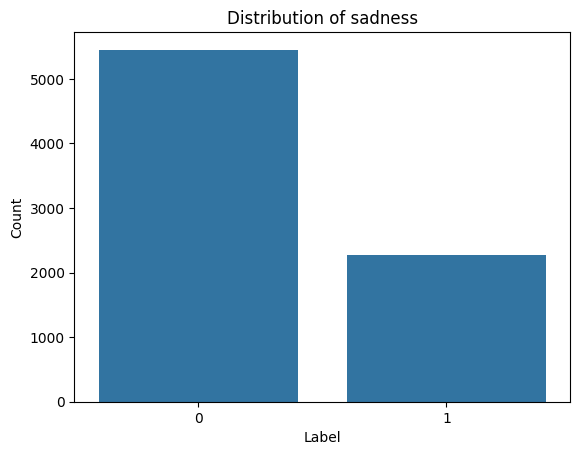

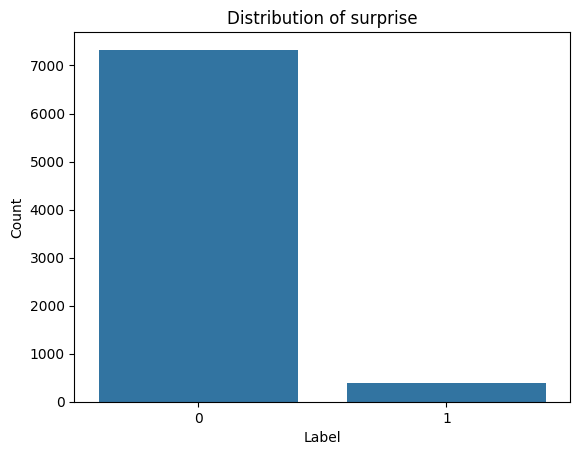

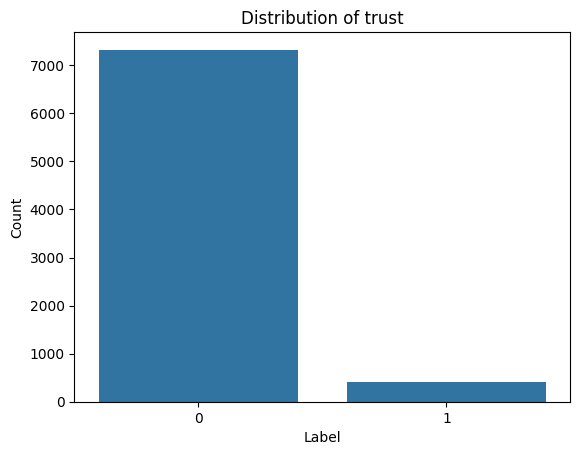

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns

class_labels = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

# Plot the distribution of each class label
plt.figure(figsize=(4, 2))
for label in class_labels:
    sns.countplot(x=label, data=df_train)
    plt.title(f'Distribution of {label}')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()


In [325]:
df_train['words_per_tweet'] = df_train['cleaned_tweets'].str.split().apply(len)

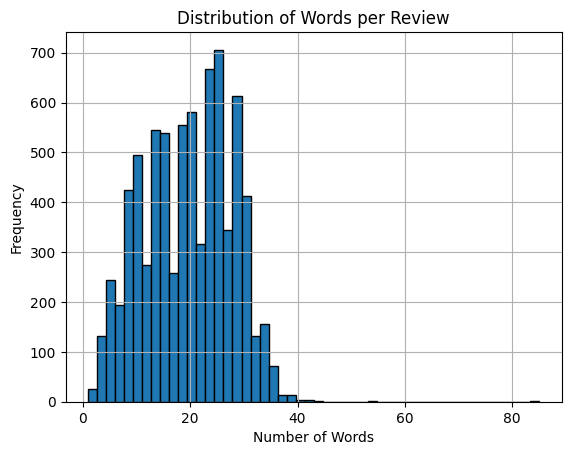

In [326]:
# Plot a histogram of the 'words_per_review' column
df_train['words_per_tweet'].hist(bins=50, edgecolor='black')

plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Words per Review')

# Display the plot
plt.show()

# <Font color = 'indianred'>**3. Split Data & Create Subsets**

In [327]:
df_train.columns

Index(['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust',
       'cleaned_tweets', 'words_per_tweet'],
      dtype='object')

In [328]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into features (X) and labels (y)
X = df_train['cleaned_tweets'].values
y = df_train[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [329]:
trainset = Dataset.from_dict({
    'texts': X_train,
    'labels': y_train
})

validset = Dataset.from_dict({
    'texts': X_val,
    'labels': y_val
})

In [330]:
y_train

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# <Font color = 'indianred'>**4. Create Custom Model and Model Config Class**

In [331]:
class CustomConfig(PretrainedConfig):
  def __init__(self, vocab_size=0, embedding_dim=0, hidden_dim1=0, hidden_dim2=0, num_labels=11, **kwargs):
      super().__init__()
      self.vocab_size = vocab_size
      self.embedding_dim = embedding_dim
      self.hidden_dim1 = hidden_dim1
      self.hidden_dim2 = hidden_dim2
      self.num_labels = num_labels

In [332]:
class CustomMLP(PreTrainedModel):
    config_class = CustomConfig

    def __init__(self, config):
        super().__init__(config)

        self.embedding_bag = nn.EmbeddingBag(config.vocab_size, config.embedding_dim)
        self.layers = nn.Sequential(
            nn.Linear(config.embedding_dim, config.hidden_dim1),
            nn.BatchNorm1d(num_features=config.hidden_dim1),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(config.hidden_dim1, config.hidden_dim2),
            nn.BatchNorm1d(num_features=config.hidden_dim2),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(config.hidden_dim2, config.num_labels)
        )


    def forward(self, input_ids, offsets, labels=None):
        embed_out = self.embedding_bag(input_ids, offsets)
        logits = self.layers(embed_out)


        loss = None
        if labels is not None:
            loss_fct = nn.BCEWithLogitsLoss()
            loss = loss_fct(logits,labels)

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits
        )

In [333]:
def get_vocab(dataset, min_freq=1):
    """
    Generate a vocabulary from a dataset.

    Args:
        dataset (Dataset): A Hugging Face Dataset object. The dataset should
                           have a key 'texts' that contains the text data.
        min_freq (int): The minimum frequency for a token to be included in
                        the vocabulary.

    Returns:
        torchtext.vocab.Vocab: Vocabulary object containing tokens from the
                               dataset that meet or exceed the specified
                               minimum frequency. It also includes a special
                               '<unk>' token for unknown words.
    """
    # Initialize a counter object to hold token frequencies
    counter = Counter()

    # Update the counter with tokens from each text in the dataset
    # Iterating through texts in the dataset
    for text in dataset['texts']:  ###### Change from previous function ####
        counter.update(str(text).split())

    # Create a vocabulary using the counter object
    # Tokens that appear fewer times than `min_freq` are excluded
    my_vocab = vocab(counter, min_freq=min_freq)

    # Insert a '<unk>' token at index 0 to represent unknown words
    my_vocab.insert_token('<unk>', 0)

    # Set the default index to 0
    # This ensures that any unknown word will be mapped to '<unk>'
    my_vocab.set_default_index(0)

    return my_vocab

In [334]:
# Creating a function that will be used to get the indices of words from vocab
def tokenizer(text, vocab):
    """Converts text to a list of indices using a vocabulary dictionary"""
    return [vocab[token] for token in str(text).split()]

In [335]:
def collate_batch(batch, my_vocab):
    """
    Prepares a batch of data by transforming texts into indices based on a vocabulary and
    converting labels into a tensor.

    Args:
        batch (list of dict): A batch of data where each element is a dictionary with keys
                              'labels' and 'texts'. 'labels' are the sentiment labels, and
                              'texts' are the corresponding texts.
        my_vocab (torchtext.vocab.Vocab): A vocabulary object that maps tokens to indices.

    Returns:
        dict: A dictionary with three keys:
              - 'input_ids': a tensor containing concatenated indices of the texts.
              - 'offsets': a tensor representing the starting index of each text in 'input_ids'.
              - 'labels': a tensor of the labels for each text in the batch.

    The function transforms each text into a list of indices based on the provided vocabulary.
    It also converts the labels into a tensor. The 'offsets' are computed to keep track of the
    start of each text within the 'input_ids' tensor, which is a flattened representation of all text indices.
    """

    # Get labels and texts from batch dict samples
    labels = [sample['labels'] for sample in batch]
    texts = [sample['texts'] for sample in batch]

    # Convert the list of labels into a tensor of dtype int32
    labels = torch.tensor(labels, dtype=torch.float32)

    # Convert the list of texts into a list of lists; each inner list contains the vocabulary indices for a text
    list_of_list_of_indices = [tokenizer(text, my_vocab) for text in texts]

    # Concatenate all text indices into a single tensor
    input_ids = torch.cat([torch.tensor(i, dtype=torch.int64) for i in list_of_list_of_indices])

    # Compute the offsets for each text in the concatenated tensor
    offsets = [0] + [len(i) for i in list_of_list_of_indices]
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)

    return {
        'input_ids': input_ids,
        'offsets': offsets,
        'labels': labels
    }

In [336]:
tweet_vocab = get_vocab(trainset, min_freq=2)
collate_fn = partial(collate_batch, my_vocab=tweet_vocab)

In [337]:
my_config = CustomConfig(vocab_size=len(tweet_vocab),
                         embedding_dim=300,
                         hidden_dim1=200,
                         hidden_dim2=100,
                         num_labels=11)

In [338]:
my_config

CustomConfig {
  "embedding_dim": 300,
  "hidden_dim1": 200,
  "hidden_dim2": 100,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10"
  },
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "transformers_version": "4.39.3",
  "vocab_size": 6552
}

In [339]:
model = CustomMLP(config=my_config)

In [340]:
model

CustomMLP(
  (embedding_bag): EmbeddingBag(6552, 300, mode='mean')
  (layers): Sequential(
    (0): Linear(in_features=300, out_features=200, bias=True)
    (1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=100, out_features=11, bias=True)
  )
)

In [347]:
from sklearn.metrics import hamming_loss,f1_score

def compute_metrics(eval_pred):

    logits, labels = eval_pred
    labels = labels.astype('int32')
    predictions = (logits>=0).astype('int32')

    hamming_loss_value = hamming_loss(labels, predictions)

    #use weighted to account for class imbalance
    f1_score_macro = f1_score(labels, predictions, average='macro')
    evaluations = {
        'hamming_loss' : hamming_loss_value,
        'f1_score': f1_score_macro,
    }
    return evaluations

In [348]:
#pip install accelerate

In [349]:
#pip list

In [350]:
#!pip install --upgrade accelerate

In [351]:
# Configure training parameters
training_args = TrainingArguments(

    # Training-specific configurations
    num_train_epochs=15,
    per_device_train_batch_size=128, # Number of samples per training batch
    per_device_eval_batch_size=128, # Number of samples per validation batch
    weight_decay=0.1, # weight decay (L2 regularization)
    learning_rate=0.001, # learning arte
    optim='adamw_torch', # optimizer
    remove_unused_columns=False, # flag to retain unused columns

    # Checkpoint saving and model evaluation settings
    output_dir=model_folder,  # Directory to save model checkpoints
    evaluation_strategy='steps',  # Evaluate model at specified step intervals
    eval_steps=25,  # Perform evaluation every 50 training steps
    save_strategy="steps",  # Save model checkpoint at specified step intervals
    save_steps=25,  # Save a model checkpoint every 50 training steps
    load_best_model_at_end=True,  # Reload the best model at the end of training
    save_total_limit=2,  # Retain only the best and the most recent model checkpoints
    # Use 'accuracy' as the metric to determine the best model
    metric_for_best_model="f1_score",
    greater_is_better=True,  # A model is 'better' if its accuracy is higher


    # Experiment logging configurations
    logging_strategy='steps',
    logging_steps=50,
    report_to='wandb',  # Log metrics and results to Weights & Biases platform
    run_name='tweet_hf_trainer',  # Experiment name for Weights & Biases
)

In [352]:
#import sys
#print(sys.path)

In [353]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=trainset,
    eval_dataset = validset,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
pip install wandb

In [307]:
!wandb login

wandb: Currently logged in as: prachidalal084 (buan6342prachidalal). Use `wandb login --relogin` to force relogin


In [308]:
%env WANDB_PROJECT = nlp_course_spring_2024-sentiment-analysis-hf-trainer

env: WANDB_PROJECT=nlp_course_spring_2024-sentiment-analysis-hf-trainer


In [354]:
trainer.train()

Step,Training Loss,Validation Loss,Hamming Loss,F1 Score,Runtime,Samples Per Second,Steps Per Second
25,No log,0.527507,0.213710,0.060733,3.160900,488.779000,4.113000
50,0.491400,0.489106,0.210238,0.086085,3.186000,484.933000,4.080000
75,0.491400,0.471368,0.206708,0.109096,3.346300,461.707000,3.885000
100,0.462500,0.464852,0.205355,0.146063,3.530800,437.574000,3.682000
125,0.462500,0.453344,0.202942,0.172319,3.179700,485.895000,4.088000
150,0.440100,0.445731,0.197411,0.188133,3.192900,483.885000,4.072000
175,0.440100,0.437623,0.193174,0.204309,3.744700,412.583000,3.472000
200,0.421700,0.437303,0.191821,0.236355,3.359100,459.945000,3.870000
225,0.421700,0.427530,0.186761,0.251444,3.278800,471.205000,3.965000
250,0.403300,0.423870,0.186408,0.260127,3.796600,406.947000,3.424000


TrainOutput(global_step=735, training_loss=0.3811204456147693, metrics={'train_runtime': 113.2309, 'train_samples_per_second': 818.548, 'train_steps_per_second': 6.491, 'total_flos': 22232141193600.0, 'train_loss': 0.3811204456147693, 'epoch': 15.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.457383394241333,
 'eval_hamming_loss': 0.16440129449838187,
 'eval_f1_score_weighted': 0.5668447263440477,
 'eval_runtime': 3.5827,
 'eval_samples_per_second': 431.241,
 'eval_steps_per_second': 3.629,
 'epoch': 15.0}

In [355]:
valid_output = trainer.predict(validset)

In [356]:
valid_output._fields

('predictions', 'label_ids', 'metrics')

In [357]:
valid_preds = (valid_output.predictions > 0).astype('int32')
valid_labels = valid_output.label_ids

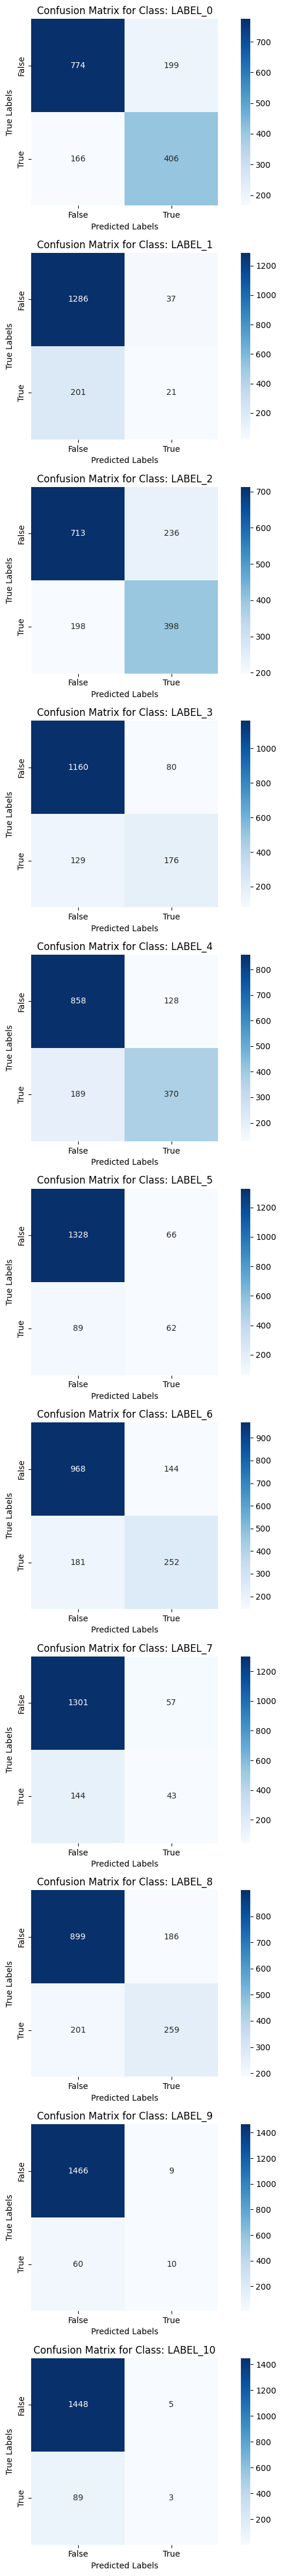

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

def plot_confusion_matrix(valid_labels, valid_preds, class_labels):
    """
    Plots a confusion matrix for each individual class.

    Args:
        valid_labels (array-like): True labels of the validation data.
        valid_preds (array-like): Predicted labels of the validation data.
        class_labels (list): List of class names for the labels.
    """
    # Compute the multilabel confusion matrix
    mcm = multilabel_confusion_matrix(valid_labels, valid_preds)

    # Plot confusion matrices for each individual class
    num_classes = len(class_labels)
    fig, axes = plt.subplots(num_classes, 1, figsize=(8, num_classes * 4), squeeze=False)

    for i, (cm, label) in enumerate(zip(mcm, class_labels)):
        ax = axes[i, 0]
        sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", ax=ax)
        ax.set_title(f'Confusion Matrix for Class: {label}')
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')
        ax.set_xticklabels(['False', 'True'])
        ax.set_yticklabels(['False', 'True'])
        ax.set_aspect('equal')

    plt.tight_layout()
    plt.show()

plot_confusion_matrix(valid_labels, valid_preds, class_labels=list(my_config.id2label.values()))

In [ ]:
# log the Confusion Matrix to Wandb
def log_confusion_matrix(valid_labels, valid_preds, class_labels):
    """
    Logs the confusion matrix to Wandb.

    Args:
        valid_labels (array-like): True labels of the validation data.
        valid_preds (array-like): Predicted labels of the validation data.
        class_labels (list): List of class names for the labels.
    """
    # Compute the multilabel confusion matrix
    mcm = multilabel_confusion_matrix(valid_labels, valid_preds)

    # Plot confusion matrices for each individual class
    num_classes = len(class_labels)
    for i, (cm, label) in enumerate(zip(mcm, class_labels)):
        # Normalize confusion matrix
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fig, ax = plt.subplots(figsize=(6, 4))
        sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", ax=ax)
        ax.set_title(f'Normalized Confusion Matrix for Class: {label}')
        ax.set_xlabel('Predicted Labels')
        ax.set_ylabel('True Labels')
        ax.set_xticklabels(['False', 'True'])
        ax.set_yticklabels(['False', 'True'])
        ax.set_aspect('equal')
        plt.close()  # Close the figure to prevent it from being displayed

        # Log the confusion matrix plot to Wandb
        wandb.log({f"conf_mat_{label}": wandb.Image(fig)})


In [358]:
print("Validation Macro F1 Score: ", f1_score(valid_labels,valid_preds, average= 'macro'), "\nValidation Hamming Loss: ",hamming_loss(valid_labels,valid_preds))

Validation Macro F1 Score:  0.344001225436933 
Validation Hamming Loss:  0.17157987643424535


In [359]:
best_model_checkpoint_step = trainer.state.best_model_checkpoint.split('-')[-1]
print(f"The best model was saved at step {best_model_checkpoint_step}.")

The best model was saved at step 725.


In [360]:
wandb.finish()

eval/f1_score,▁▂▂▃▄▄▅▅▆▆▆▆▇▇▇▇▇▇█▇█████████
eval/hamming_loss,█▇▇▇▆▅▅▄▄▄▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁
eval/loss,█▆▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁
eval/runtime,▁▁▂▃▁▁▅▂▂▅▁▁▄▂▁▁▄▁▁▅█▂▅▁▁▄▁▁▃
eval/samples_per_second,██▆▅██▄▆▇▃█▇▅▆█▇▄██▃▁▇▃██▄██▅
eval/steps_per_second,██▆▅██▄▆▇▃█▇▅▆█▇▄██▃▁▇▃██▄█▇▅
train/epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/global_step,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
train/grad_norm,▂▂▃▂▅▂▂▁▅█▄▂▄▄
train/learning_rate,█▇▇▆▆▅▅▄▄▃▃▂▂▁
train/loss,█▇▆▅▄▄▃▃▂▂▁▁▁▁


In [361]:
model_checkpoint = model_folder/f'checkpoint-{best_model_checkpoint_step}'

In [362]:
model = CustomMLP(my_config)

In [363]:
model

CustomMLP(
  (embedding_bag): EmbeddingBag(6552, 300, mode='mean')
  (layers): Sequential(
    (0): Linear(in_features=300, out_features=200, bias=True)
    (1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=100, out_features=11, bias=True)
  )
)

In [364]:
model = model.from_pretrained(model_checkpoint, config = my_config)

In [365]:
model

CustomMLP(
  (embedding_bag): EmbeddingBag(6552, 300, mode='mean')
  (layers): Sequential(
    (0): Linear(in_features=300, out_features=200, bias=True)
    (1): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=100, out_features=11, bias=True)
  )
)

In [366]:
# Create a partial function 'collate_fn' using 'collate_batch' with 'my_vocab' set to 'imdb_vocab'
# This function will be used by the Trainer to process batches of data during evaluation
collate_fn = partial(collate_batch, my_vocab=tweet_vocab)

# Configure training arguments for model evaluation
# 'output_dir' specifies where to save the results
# 'per_device_eval_batch_size' sets the batch size for evaluation, adjusted based on available GPU memory
# 'do_train = False' and 'do_eval=True' indicate that training is not performed, but evaluation is
# 'remove_unused_columns=False' ensures that all columns in the dataset are retained during evaluation
# 'report_to=[]' disables logging to external services like Weights & Biases

training_args = TrainingArguments(
    output_dir="./results",
    per_device_eval_batch_size=16,
    do_train=False,
    do_eval=True,
    remove_unused_columns=False,
    report_to=[]
)

In [367]:
df_test

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,cleaned_tweets
0,2018-01559,@Adnan__786__ @AsYouNotWish Dont worry Indian ...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,@adnan__786 _ _ @asyounotwish do nt worry indi...
1,2018-03739,"Academy of Sciences, eschews the normally sobe...",NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,"academy of sciences , eschews the normally sob..."
2,2018-00385,I blew that opportunity -__- #mad,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,i blew that opportunity -__- # mad
3,2018-03001,This time in 2 weeks I will be 30... 😥,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,this time in 2 weeks i will be 30 ... 😥
4,2018-01988,#Deppression is real. Partners w/ #depressed p...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,# deppression is real . partners w/ # depresse...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2018-03848,shaft abrasions from panties merely shifted to...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,shaft abrasions from panties merely shifted to...
3255,2018-00416,@lomadia heard of Remothered? Indie horror gam...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,@lomadia heard of remothered ? indie horror ga...
3256,2018-03717,All this fake outrage. Y'all need to stop 🤣,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,all this fake outrage . y'all need to stop 🤣
3257,2018-03504,Would be ever so grateful if you could record ...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,would be ever so grateful if you could record ...


In [368]:
# Replace "NONE" labels with 0s
label_columns = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
df_test[label_columns] = df_test[label_columns].replace('NONE', 0)

# Verify the changes
df_test.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,cleaned_tweets
0,2018-01559,@Adnan__786__ @AsYouNotWish Dont worry Indian ...,0,0,0,0,0,0,0,0,0,0,0,@adnan__786 _ _ @asyounotwish do nt worry indi...
1,2018-03739,"Academy of Sciences, eschews the normally sobe...",0,0,0,0,0,0,0,0,0,0,0,"academy of sciences , eschews the normally sob..."
2,2018-00385,I blew that opportunity -__- #mad,0,0,0,0,0,0,0,0,0,0,0,i blew that opportunity -__- # mad
3,2018-03001,This time in 2 weeks I will be 30... 😥,0,0,0,0,0,0,0,0,0,0,0,this time in 2 weeks i will be 30 ... 😥
4,2018-01988,#Deppression is real. Partners w/ #depressed p...,0,0,0,0,0,0,0,0,0,0,0,# deppression is real . partners w/ # depresse...


In [369]:
X_test = df_test['cleaned_tweets'].values
y_test = df_test[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']].values

In [370]:
testset = Dataset.from_dict({
    'texts': X_test,
    'labels': y_test
})

In [371]:
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=testset,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [372]:
trainer.evaluate()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


{'eval_loss': 0.3710368275642395,
 'eval_hamming_loss': 0.14602917794080728,
 'eval_f1_score': 0.0,
 'eval_runtime': 50.636,
 'eval_samples_per_second': 64.361,
 'eval_steps_per_second': 4.029}

In [373]:
test_predictions = trainer.predict(testset)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [374]:
test_predictions._fields

('predictions', 'label_ids', 'metrics')

In [375]:
test_predictions.metrics

{'test_loss': 0.3710368275642395,
 'test_hamming_loss': 0.14602917794080728,
 'test_f1_score': 0.0,
 'test_runtime': 50.121,
 'test_samples_per_second': 65.023,
 'test_steps_per_second': 4.07}

In [376]:
test_predictions.label_ids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [377]:
test_preds = (valid_output.predictions > 0).astype('int32')
test_labels = valid_output.label_ids

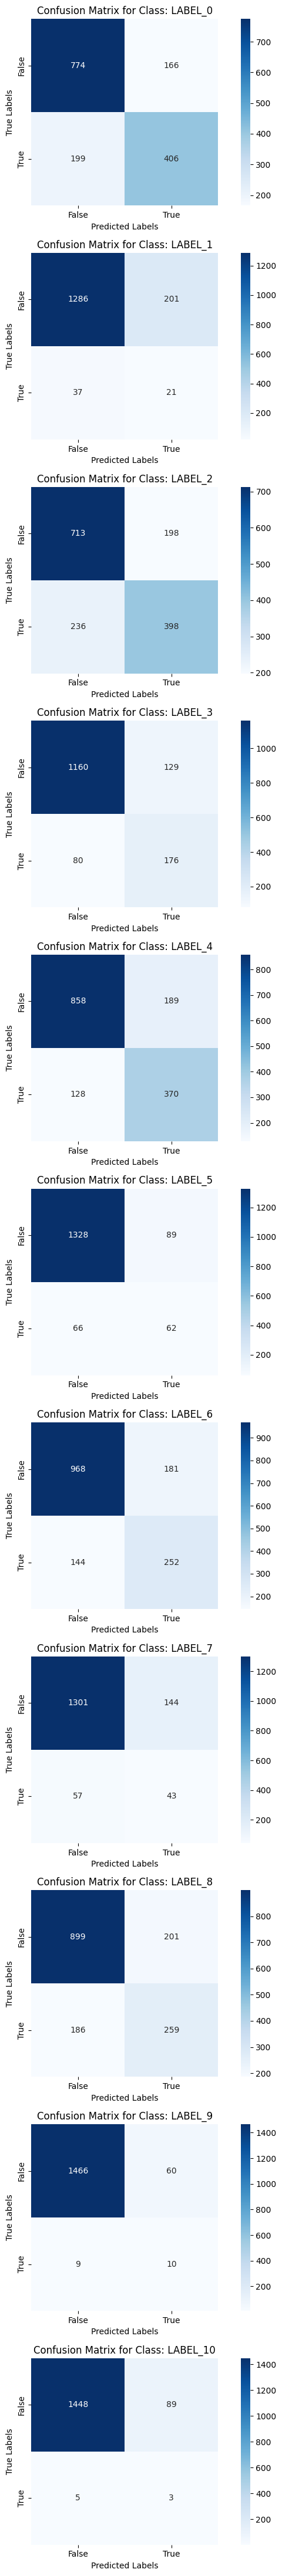

In [ ]:
plot_confusion_matrix(test_preds, test_labels, class_labels=list(my_config.id2label.values()))

In [395]:
sample_X = X_test
sample_X

array(['@adnan__786 _ _ @asyounotwish do nt worry indian army is on its ways to dispatch all terrorists to hell',
       'academy of sciences , eschews the normally sober tone of scientific papers and calls the massive loss of wildlife a “ biological annihilation',
       'i blew that opportunity -__- # mad', ...,
       "all this fake outrage . y'all need to stop 🤣",
       'would be ever so grateful if you could record garden of forgiveness gentleman @lukegoss @mattgoss # amazing',
       "i 'm the wholesome drunk that sends people memes and compliments them at 2 am on snap"],
      dtype=object)

In [396]:
len(sample_X)

3259

In [397]:
device = 'cpu'
# Convert the list of texts into a list of lists; each inner list contains the vocabulary indices for a text
list_of_list_of_indices = [tokenizer(text, tweet_vocab) for text in sample_X]

# Compute the offsets for each text in the concatenated tensor
offsets = [0] + [len(i) for i in list_of_list_of_indices]
offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)

# Concatenate all text indices into a single tensor
indices = torch.cat([torch.tensor(i, dtype=torch.int64) for i in list_of_list_of_indices])

In [398]:
# move model to appropriate device
model.to(device)

# put model in evaluation mode
model.eval()

# get outputs (logits) from model
outputs = model(indices, offsets)
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[ 1.5805, -2.4405,  1.2676,  ..., -0.9366, -2.9024, -4.5743],
        [-1.3813, -1.1516, -1.3014,  ..., -1.8532, -2.8040, -2.2766],
        [-1.6624, -1.1899, -1.5771,  ..., -1.1250, -2.0257, -2.0389],
        ...,
        [ 1.7466, -1.9794,  1.3634,  ..., -0.8154, -3.2626, -3.9466],
        [-2.7825, -0.6844, -2.6981,  ..., -2.2405, -2.1105, -0.9050],
        [ 0.4200, -1.6830,  0.2327,  ..., -1.3908, -2.1320, -2.8907]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [399]:
predictions = (outputs.logits>=0).int()
predictions

tensor([[1, 0, 1,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 0, 1,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 1,  ..., 0, 0, 0]], dtype=torch.int32)

In [400]:
import pandas as pd

# Create a DataFrame for predictions
predictions_df = pd.DataFrame(predictions.numpy(), columns=df_test.columns[2:-1])

# Merge predictions DataFrame with the original DataFrame using the index
merged_df = df_test[['ID']].merge(predictions_df, left_index=True, right_index=True)

# Display the merged DataFrame
merged_df

,ID,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-01559,1,0,1,0,0,0,0,0,0,0,0
1,2018-03739,0,0,0,0,0,0,0,0,0,0,0
2,2018-00385,0,0,0,0,1,0,0,0,0,0,0
3,2018-03001,0,0,0,0,1,0,0,0,0,0,0
4,2018-01988,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3254,2018-03848,0,0,0,0,0,0,0,0,0,0,0
3255,2018-00416,0,0,0,0,0,0,0,0,0,0,0
3256,2018-03717,1,0,1,0,0,0,0,0,0,0,0
3257,2018-03504,0,0,0,0,1,0,1,0,0,0,0


In [401]:
print("Test Macro F1 Score: ", f1_score(test_labels,test_preds, average= 'macro'), "\nTest Hamming Loss: ",hamming_loss(test_labels,test_preds))

Test Macro F1 Score:  0.344001225436933 
Test Hamming Loss:  0.17157987643424535


In [405]:
print(merged_df.iloc[14])

ID              2018-01203
anger                    0
anticipation             0
disgust                  0
fear                     0
joy                      1
love                     0
optimism                 0
pessimism                0
sadness                  0
surprise                 0
trust                    0
Name: 14, dtype: object


In [408]:
merged_df.to_csv('test_kaggle')